In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


In [37]:
# Load datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_data = pd.read_csv('../data/creditcard.csv')

# View basic info
fraud_data.info()
ip_data.info()
credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower

### Handling Missing Values

In [40]:
# Check for missing values in the dataset
missing_values = fraud_data.isnull().sum()
print("Missing Values fraud_data in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values fraud_data in Each Column:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
No missing values found in the dataset.


In [41]:
# Check for missing values in the dataset
missing_values = ip_data.isnull().sum()
print("Missing Values ip_data in Each Column:")
print(missing_values)

# Confirm if there are any missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"There are {missing_values.sum()} missing values in the dataset.")

Missing Values ip_data in Each Column:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
No missing values found in the dataset.


### Missing Values: No missing values found in the dataset.

### Data Types: All data types are correct except for signup_time and purchase_time, which are currently of type object.

### Conversion: The signup_time and purchase_time columns will be converted to standard datetime format.

### Understanding the Data Features

In [11]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [12]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [13]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Conversion to Datetime Format

In [43]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Verify the data types after conversion
print("Data Types After Conversion:")
print(fraud_data.dtypes)

Data Types After Conversion:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


### Check for duplicate rows

In [44]:
# Check for duplicate rows in the DataFrame
duplicate_count = fraud_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count:
    fraud_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


### Summary Statistics

In [45]:
# Summary Statistics of numerical features
fraud_data.describe(include='number')

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


User ID:

The IDs range from 2 to 400,000, distributed with a mean of 200,171.
The spread (standard deviation) is large, indicating a diverse set of user IDs.
Purchase Value:

Values range from 9 to 154, with an average of 36.94.
Most purchase values are concentrated between 22 (25th percentile) and 49 (75th percentile).
Age:

The ages range from 18 to 76, with an average of 33.14 years.
The majority of users are between 27 and 39 years old.
IP Address:

IP addresses range from 52,093 to ~4.29 billion.
The distribution is quite spread out, with a mean around 2.15 billion.
Class (Fraud Indicator):

The class column (indicating fraud) is mostly 0 (non-fraud).
With a mean of 0.09, only around 9.36% of the entries are fraudulent.
Summary
This dataset contains 151,112 entries with information about users, their purchases, and whether the transaction is classified as fraudulent.
Most users are young adults (around 33 years old), with typical purchase values between 22 and 49.
Fraud cases represent a small fraction (~9%) of the total transactions, as indicated by the class column.

In [46]:
# Statistical summary of object data features
fraud_data.describe(include='object')

,device_id,source,browser,sex
count,151112,151112,151112,151112
unique,137956,3,5,2
top,CQTUVBYIWWWBC,SEO,Chrome,M
freq,20,60615,61432,88293


## Convert IP Addresses to Integer Format
## To merge the datasets later, convert the IP addresses to integers
### Goal: Ensure that IP addresses are comparable between the two datasets.

In [51]:
import pandas as pd
ip_country_data = pd.read_csv('../data/IpAddress_to_Country.csv')
# Ensure the ip_to_int function is defined
def ip_to_int(ip_address):
    # Your implementation to convert IP address to integer
    pass

# Convert IP addresses in fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(
    lambda x: ip_to_int(str(x)) if isinstance(x, str) and not pd.isna(x) else None
)

# Drop rows with invalid IPs
fraud_data.dropna(subset=['ip_int'], inplace=True)

# Convert bounds in the country data to integer, handle potential errors
ip_country_data['lower_bound_ip_address'] = pd.to_numeric(ip_country_data['lower_bound_ip_address'], errors='coerce').astype('Int64')
ip_country_data['upper_bound_ip_address'] = pd.to_numeric(ip_country_data['upper_bound_ip_address'], errors='coerce').astype('Int64')

# Sort both datasets for merge_asof
fraud_data.sort_values('ip_int', inplace=True)
ip_country_data.sort_values('lower_bound_ip_address', inplace=True)

# Optionally, reset the index after sorting
fraud_data.reset_index(drop=True, inplace=True)
ip_country_data.reset_index(drop=True, inplace=True)


In [55]:
# Step 2.1: Convert floating IP address to string (dotted-decimal format)
fraud_data['ip_address_str'] = fraud_data['ip_address'].apply(float_to_ip)

# Step 2.2: Use the ip_to_int function to convert the IP to an integer
def ip_to_int(ip):
    try:
        octets = ip.split('.')
        return (int(octets[0]) << 24) + (int(octets[1]) << 16) + (int(octets[2]) << 8) + int(octets[3])
    except:
        return np.nan

fraud_data['ip_int'] = fraud_data['ip_address_str'].apply(ip_to_int)

# Drop the temporary IP address string column
fraud_data.drop('ip_address_str', axis=1, inplace=True)


In [56]:
# Check the first few rows of 'ip_address' and 'ip_int'
print(fraud_data[['ip_address', 'ip_int']].head(10))

# Verify if there are still any missing values in 'ip_int'
print(f"Missing values in 'ip_int': {fraud_data['ip_int'].isna().sum()}")


Empty DataFrame
Columns: [ip_address, ip_int]
Index: []
Missing values in 'ip_int': 0


In [58]:
print(fraud_data.dtypes)  # Check if 'ip_address' has the expected data type (e.g., float or object)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
ip_int                   float64
country                  float64
dtype: object


In [60]:
import numpy as np

# Step 1: Ensure there are no NaN values by creating a modified DataFrame
fraud_data = fraud_data.copy()
fraud_data['ip_address'] = fraud_data['ip_address'].fillna(-1).astype(int)

# Step 2: Convert integer IPs to dotted-decimal format
def float_to_ip(ip):
    try:
        # Convert integer to dotted-decimal format
        return '.'.join([str((ip >> (8 * i)) & 0xFF) for i in range(3, -1, -1)])
    except:
        return np.nan

fraud_data['ip_address_str'] = fraud_data['ip_address'].apply(float_to_ip)

# Step 3: Convert IP strings back to integer representation
def ip_to_int(ip):
    try:
        octets = ip.split('.')
        return (int(octets[0]) << 24) + (int(octets[1]) << 16) + (int(octets[2]) << 8) + int(octets[3])
    except:
        return np.nan

fraud_data['ip_int'] = fraud_data['ip_address_str'].apply(ip_to_int)

# Step 4: Drop the temporary IP string column
fraud_data.drop('ip_address_str', axis=1, inplace=True)

# Verify the result
print(fraud_data[['ip_address', 'ip_int']].head())


Empty DataFrame
Columns: [ip_address, ip_int]
Index: []


In [63]:
# Re-read the data to confirm if the 'ip_address' column is empty in the original dataset.
import pandas as pd

# Replace 'your_file.csv' with your actual file path.
fraud_data = pd.read_csv('../data/Fraud_Data.csv')

print(fraud_data.info())  # Check column types and non-null counts.
print(fraud_data.head())   # Look at the first few rows.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1

In [64]:
import pandas as pd
import numpy as np
# Step 1: Define the conversion function from float to dotted IP format
def float_to_ip(ip_float):
    try:
        ip_int = int(ip_float)  # Convert float to int
        return '.'.join([str((ip_int >> (i * 8)) & 255) for i in range(4)[::-1]])
    except:
        return np.nan  # Handle any conversion issues gracefully

# Step 2: Apply the conversion function to the 'ip_address' column
fraud_data['ip_address_str'] = fraud_data['ip_address'].apply(float_to_ip)

# Step 3: Verify the first few conversions
print(fraud_data[['ip_address', 'ip_address_str']].head())


     ip_address ip_address_str
0  7.327584e+08    43.173.1.96
1  3.503114e+08  20.225.83.219
2  2.621474e+09  156.64.132.28
3  3.840542e+09  228.234.6.235
4  4.155831e+08  24.197.75.141


In [66]:
invalid_ips = fraud_data[fraud_data['ip_address_str'].str.contains(r'(\d{4,}|\b256\b)')]
print(invalid_ips)


C:\Users\user\AppData\Local\Temp\ipykernel_6808\3299391816.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  invalid_ips = fraud_data[fraud_data['ip_address_str'].str.contains(r'(\d{4,}|\b256\b)')]


Empty DataFrame
Columns: [user_id, signup_time, purchase_time, purchase_value, device_id, source, browser, sex, age, ip_address, class, ip_address_str]
Index: []


In [67]:
fraud_data.drop('ip_address', axis=1, inplace=True)


In [68]:
fraud_data.groupby('ip_address_str')['user_id'].count().sort_values(ascending=False).head(10)


ip_address_str
230.244.27.241     20
89.147.48.115      20
34.85.253.200      20
122.63.57.176      20
20.197.150.88      19
182.81.92.160      19
208.206.242.213    19
107.29.25.29       19
175.28.200.111     19
107.82.52.244      19
Name: user_id, dtype: int64

### Merge Datasets Based on IP Range
### Now, merge the fraud_data and ip_data datasets to add country information.
###  Goal: Enrich the fraud dataset with country information for each transaction.


In [71]:
print(fraud_data.columns)
print(ip_country_data.columns)


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'class',
       'ip_address_str'],
      dtype='object')
Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


In [72]:
import pandas as pd
import ipaddress


In [73]:
# Convert ip_address_str to its integer representation
fraud_data['ip_int'] = fraud_data['ip_address_str'].apply(lambda x: int(ipaddress.ip_address(x)))

# Verify the new column is created
print(fraud_data[['ip_address_str', 'ip_int']].head())


  ip_address_str      ip_int
0    43.173.1.96   732758368
1  20.225.83.219   350311387
2  156.64.132.28  2621473820
3  228.234.6.235  3840542443
4  24.197.75.141   415583117


In [78]:
# Ensure 'fraud_data' is sorted by 'ip_int'
fraud_data = fraud_data.sort_values(by='ip_int')

# Ensure 'ip_country_data' is sorted by 'lower_bound_ip_address'
ip_country_data = ip_country_data.sort_values(by='lower_bound_ip_address')

# Now perform the merge
merged_data = pd.merge_asof(
    fraud_data,
    ip_country_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int is within the lower and upper bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                          (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]




In [77]:
merged_data.to_csv('../data/merged_fraud_data.csv')
# Display the first few rows of the merged dataset with country information
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_address_str,ip_int,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,0,1.0.6.112,16778864,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,0,1.0.253.61,16842045,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,0,1.1.3.136,16843656,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,0,1.2.118.236,16938732,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,0,1.2.248.208,16971984,16941056.0,16973823.0,Thailand


### Handle Missing Values and Data Cleaning
### Proceed to handle missing values, duplicates, and data types after merging.

In [81]:
import pandas as pd

# Handling missing values safely
for column in merged_data.columns:
    if merged_data[column].dtype == 'object':  # Categorical column
        merged_data[column] = merged_data[column].fillna(merged_data[column].mode()[0])
    else:  # Numerical column
        merged_data[column] = merged_data[column].fillna(merged_data[column].mean())

# Check for duplicates (already done)
duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Ensure correct data types (already done)
# Convert 'signup_time' and 'purchase_time' to datetime (already done)
# Check data types (already done)

# Save the cleaned DataFrame to a new CSV file
merged_data.to_csv('../data/cleaned_merged_data.csv', index=False)


Number of duplicate rows: 0


### Data Type Corrections:

### signup_time and purchase_time are stored as object (string). These should be converted to datetime for analysis

In [82]:

# Convert 'signup_time' and 'purchase_time' to datetime
merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'], errors='coerce')
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'], errors='coerce')

# Check the data types again to confirm the conversion
print(merged_data.dtypes)


user_id                            int64
signup_time               datetime64[ns]
purchase_time             datetime64[ns]
purchase_value                     int64
device_id                         object
source                            object
browser                           object
sex                               object
age                                int64
class                              int64
ip_address_str                    object
ip_int                             int64
lower_bound_ip_address           float64
upper_bound_ip_address           float64
country                           object
dtype: object


## Handling Missing ip_int Values:

In [83]:
# Check for missing values in ip_int
missing_ip_int_count = merged_data['ip_int'].isna().sum()
print(f"Missing ip_int values: {missing_ip_int_count}")

# Option 1: Drop rows with missing ip_int
merged_data_cleaned = merged_data.dropna(subset=['ip_int'])

# Option 2: Fill missing values with a default value (e.g., 0)
# merged_data['ip_int'].fillna(0, inplace=True)

# Option 3: Interpolate missing values
# merged_data['ip_int'].interpolate(method='linear', inplace=True)

# Display the cleaned DataFrame
print(merged_data_cleaned)
# Or if you used a different strategy, print the relevant DataFrame
# print(merged_data)

# Check again for missing values
print(merged_data_cleaned.isna().sum())


Missing ip_int values: 0
        user_id         signup_time       purchase_time  purchase_value  \
634      247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635      220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636      390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637       69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638      174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   
...         ...                 ...                 ...             ...   
131724    33024 2015-04-12 21:07:04 2015-05-12 22:42:35              56   
131725    62132 2015-08-07 10:46:59 2015-08-27 22:35:23              36   
131726   363333 2015-02-09 07:56:12 2015-03-19 16:55:29              37   
131727   340800 2015-05-10 19:31:22 2015-05-15 09:27:33               9   
131728   244330 2015-01-31 03:06:13 2015-05-23 11:23:39              18   

            device_id  source  browser sex  age  class   ip_address_str  \

In [84]:
# Save the cleaned DataFrame to a new CSV file
merged_data.to_csv('../data/cleaned_merged_data.csv', index=False)

# EDA

### Data Distribution

### Overview of the Dataset

In [97]:
# Display the first few rows of the dataset
print(merged_data.head())

# Summary statistics
print(merged_data.describe())

# Info about data types and missing values
print(merged_data.info())


     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

         device_id  source browser sex  age  class ip_address_str    ip_int  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30      0      1.0.6.112  16778864   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34      0     1.0.253.61  16842045   
636  LVCSXLISZHVUO     Ads      IE   M   29      0      1.1.3.136  16843656   
637  UHAUHNXXUADJE  Direct  Chrome   F   30      0    1.2.118.236  16938732   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37      0    1.2.248.208  16971984   

     lower_bound_ip_address  upper_bound_ip_address    country  
634              16778240.0

In [98]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


# Univariate Analysis

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
# Summary statistics
summary_stats = merged_data.describe()
print(summary_stats)


             user_id                    signup_time  \
count  129146.000000                         129146   
mean   200130.920416  2015-04-19 20:20:01.988253696   
min         2.000000            2015-01-01 00:00:42   
25%    100603.250000            2015-02-18 02:07:27   
50%    199971.500000            2015-04-18 21:04:32   
75%    299994.750000  2015-06-18 11:50:54.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115358.923526                            NaN   

                       purchase_time  purchase_value            age  \
count                         129146   129146.000000  129146.000000   
mean   2015-06-15 21:00:52.277546240       36.932456      33.128413   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%    2015-04-18 05:24:26.249999872       22.000000      27.000000   
50%              2015-06-18 08:10:14       35.000000      33.000000   
75%       2015-08-17 16:25:27.500000       49.000000      39.000000   
max    

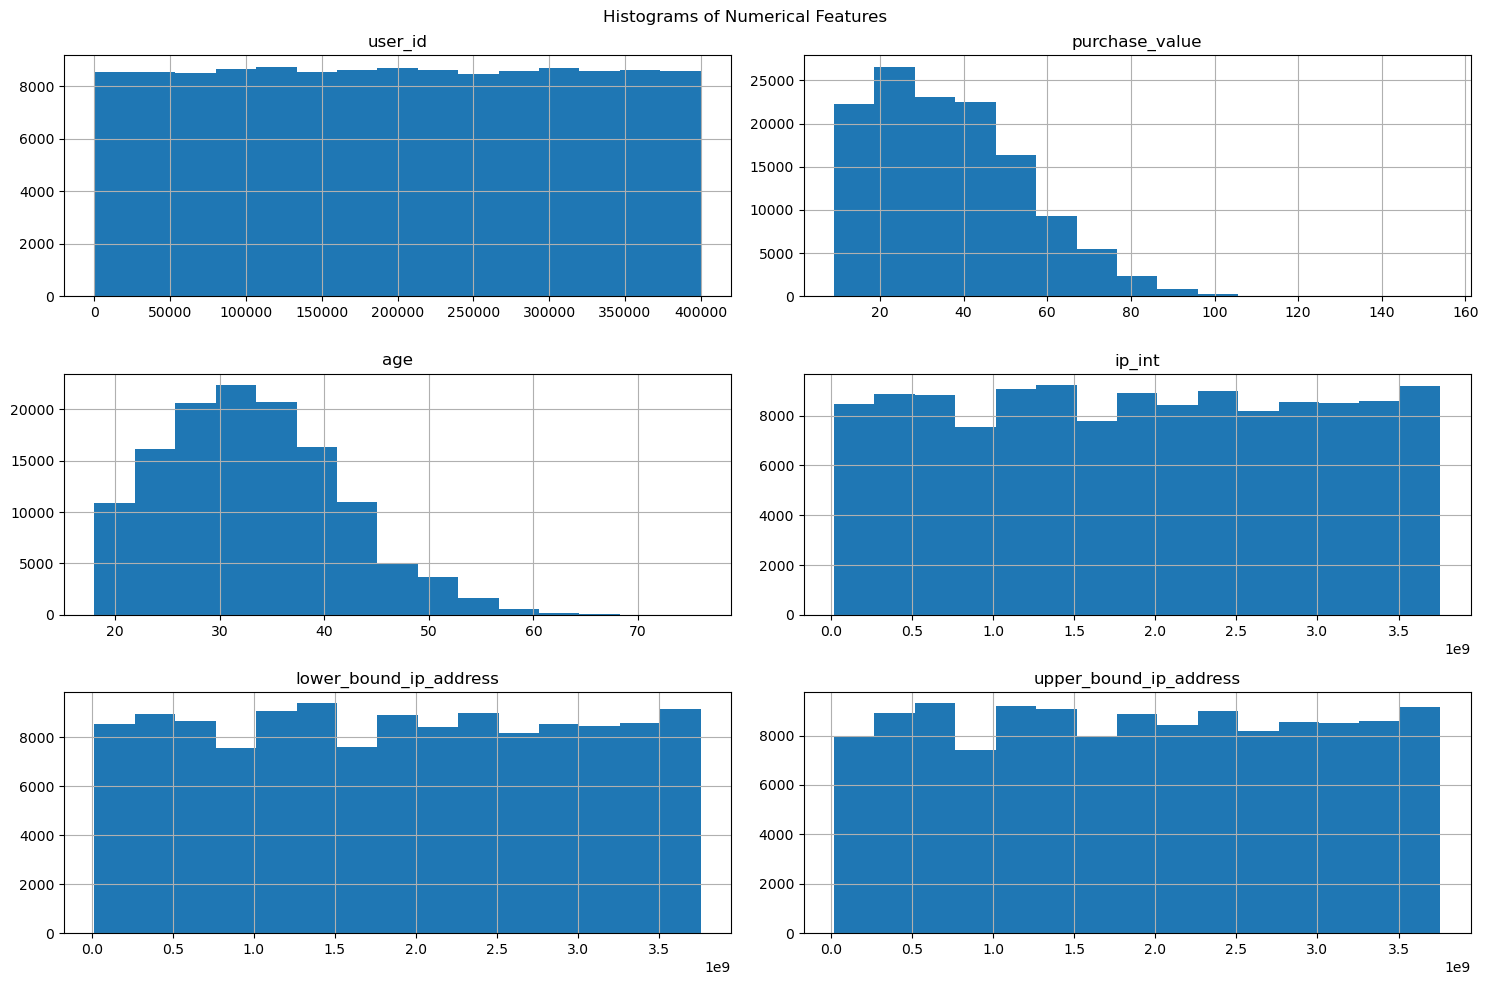

In [101]:
# Histograms for numerical features
numerical_cols = ['user_id', 'purchase_value', 'age', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address']
merged_data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()


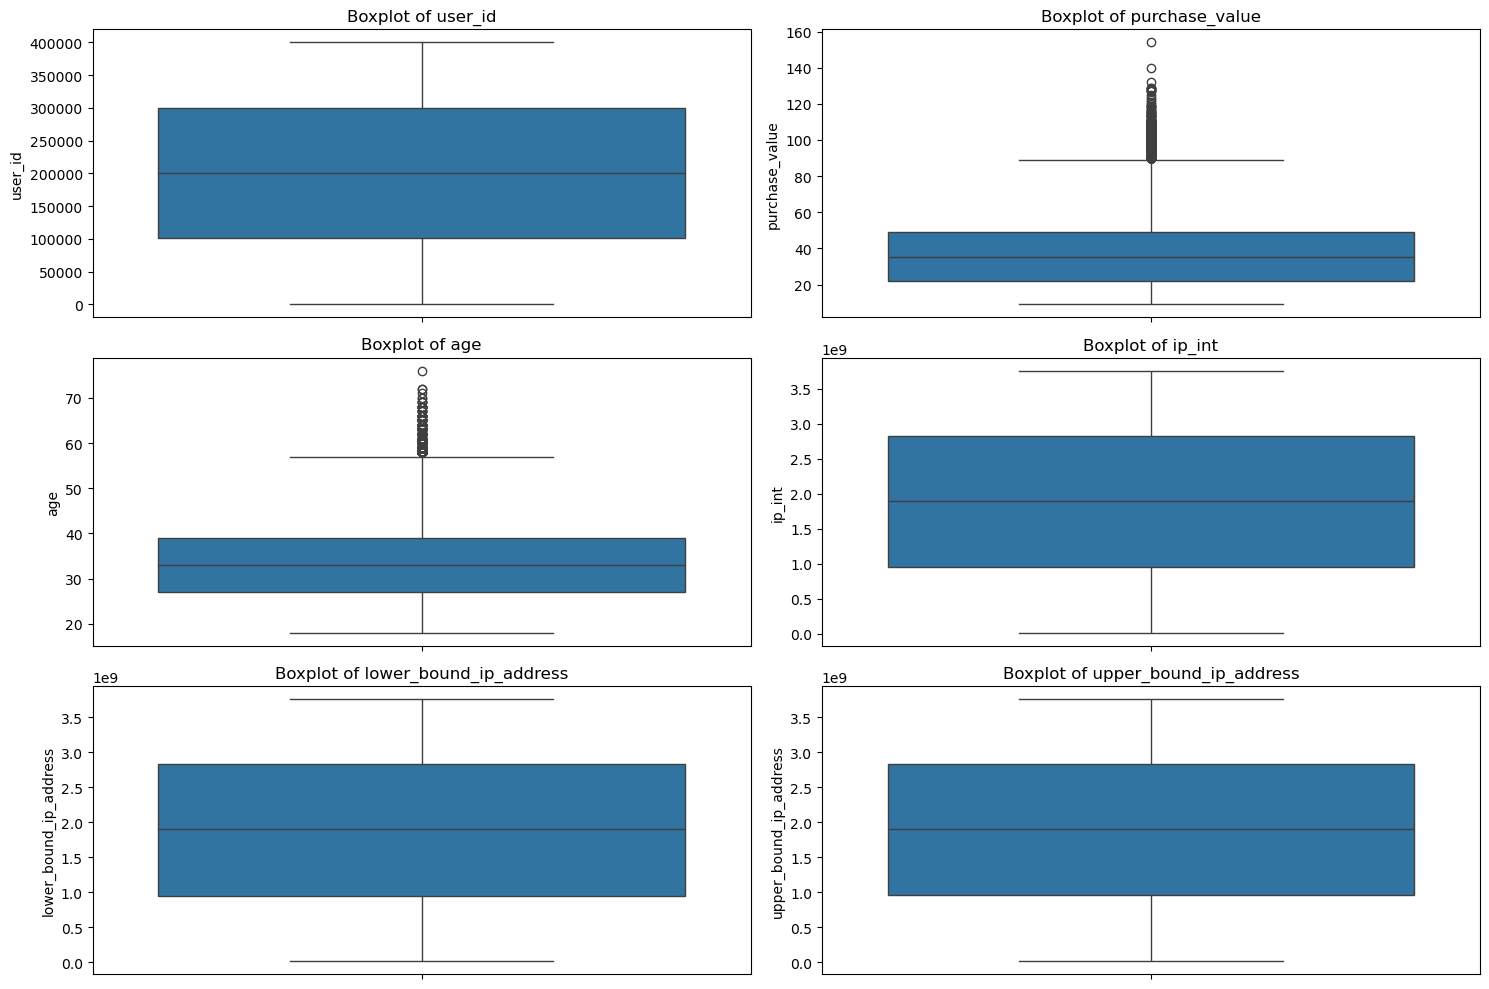

In [102]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=merged_data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [104]:
# Categorical columns
categorical_cols = ['device_id', 'source', 'browser', 'sex', 'class', 'country']

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 2))
    sns.countplot(data=merged_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


KeyboardInterrupt: 

In [ ]:
# Frequency distribution for categorical features
for col in categorical_cols:
    frequency = merged_data[col].value_counts()
    print(f'Frequency Distribution of {col}:\n{frequency}\n')


In [ ]:

# Histograms for signup_time and purchase_time
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
merged_data['signup_time'].hist(bins=30)
plt.title('Signup Time Distribution')
plt.xlabel('Signup Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
merged_data['purchase_time'].hist(bins=30)
plt.title('Purchase Time Distribution')
plt.xlabel('Purchase Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


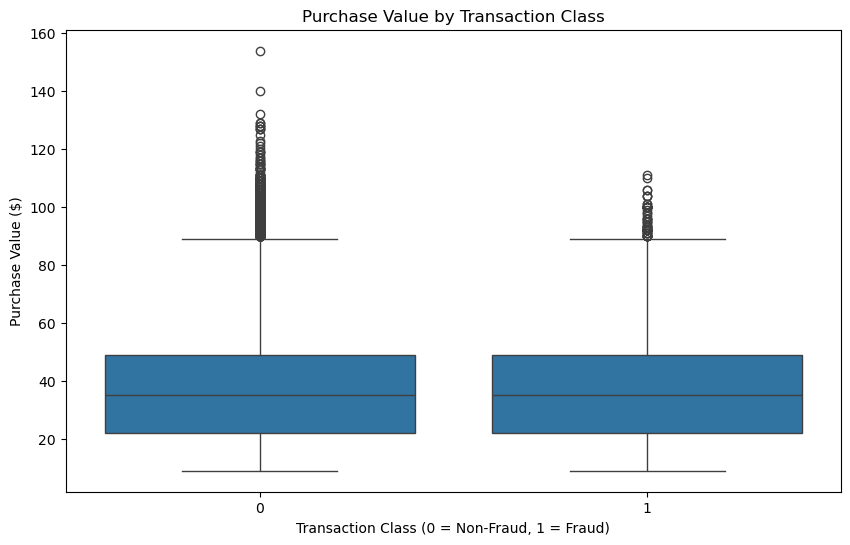

In [106]:
# Bivariate Analysis
# Purchase Value vs. Class

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=merged_data)
plt.title('Purchase Value by Transaction Class')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Purchase Value ($)')
plt.show()


# Age vs. Class

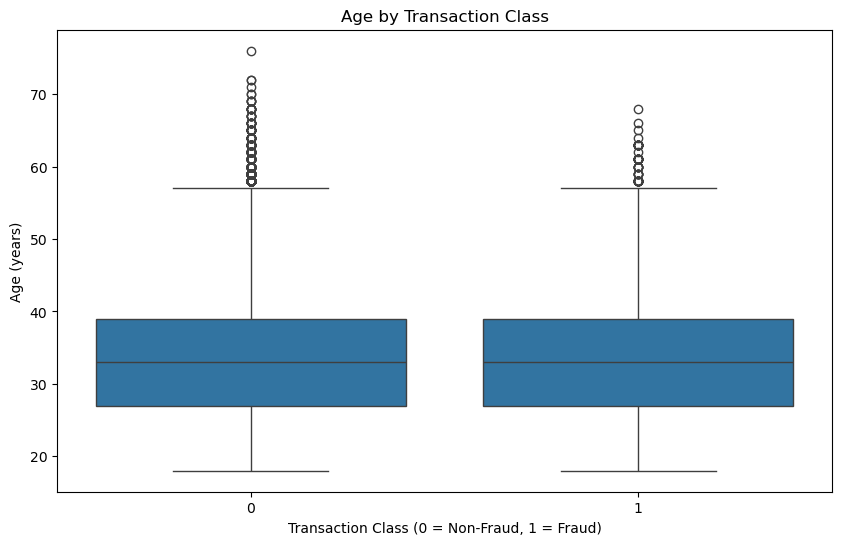

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=merged_data)
plt.title('Age by Transaction Class')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Age (years)')
plt.show()


# Purchase Value vs. Age

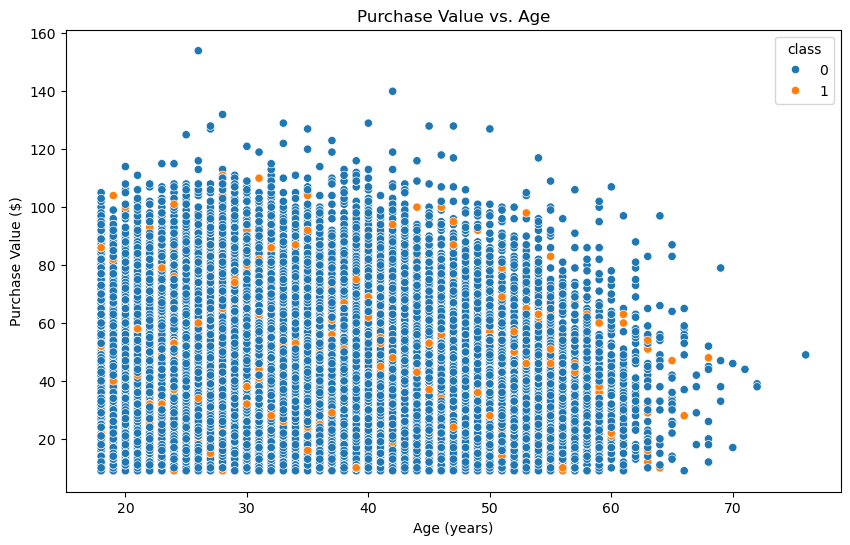

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='purchase_value', hue='class', data=merged_data)
plt.title('Purchase Value vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Purchase Value ($)')
plt.show()


# Purchase Value vs. Age by Class

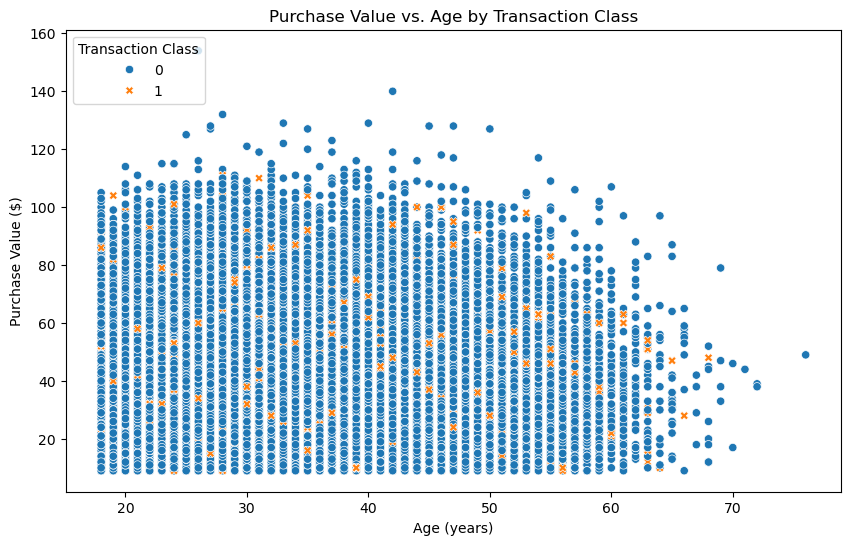

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='purchase_value', hue='class', style='class', data=merged_data)
plt.title('Purchase Value vs. Age by Transaction Class')
plt.xlabel('Age (years)')
plt.ylabel('Purchase Value ($)')
plt.legend(title='Transaction Class', loc='upper left')
plt.show()


In [111]:
# Replace NaN countries with 'Unknown'
merged_data['country'] = merged_data['country'].fillna('Unknown')


 Perform Geolocation Analysis

In [112]:
fraud_by_country = merged_data[merged_data['class'] == 1]['country'].value_counts()
print(fraud_by_country)


country
United States        5551
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
                     ... 
Honduras                1
Mauritius               1
Macedonia               1
Angola                  1
Montenegro              1
Name: count, Length: 109, dtype: int64


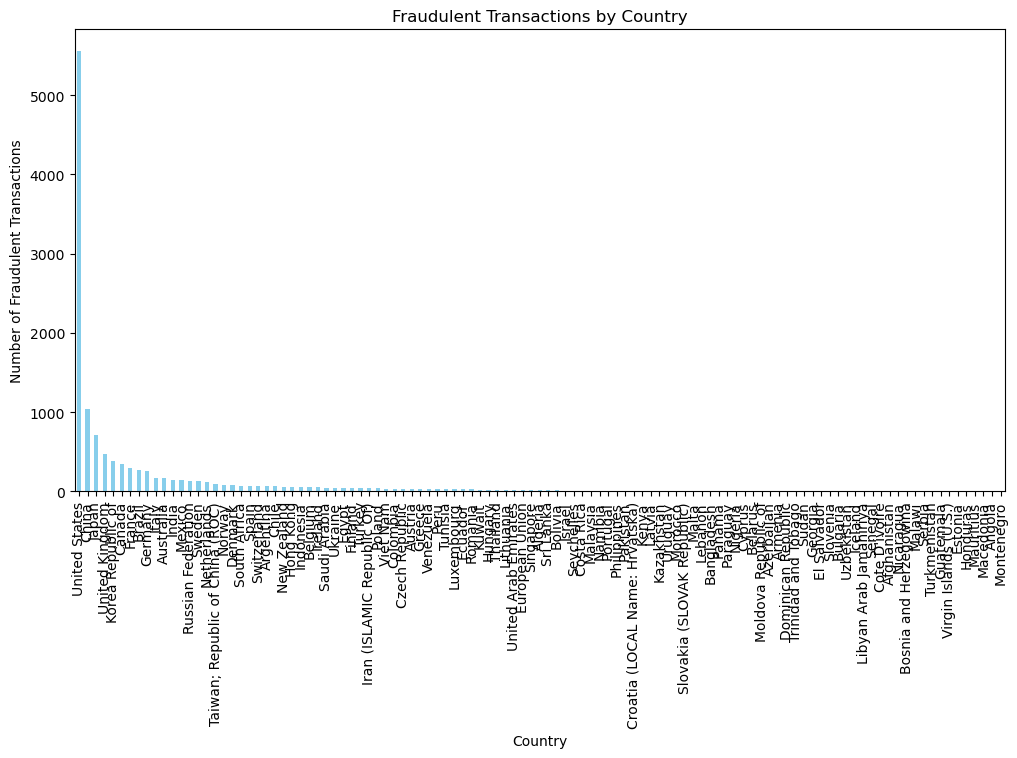

In [113]:
import matplotlib.pyplot as plt

fraud_by_country.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Fraudulent Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6808\1555450779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_data['date'] = fraud_data['purchase_time'].dt.date


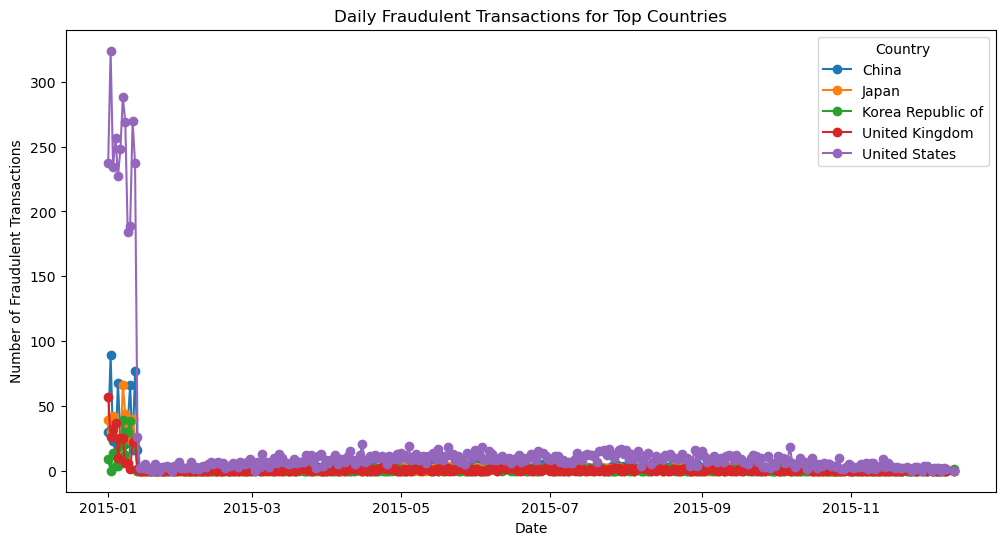

In [114]:
# Convert 'purchase_time' to datetime format for time-based analysis
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Filter for fraudulent transactions only (class == 1)
fraud_data = merged_data[merged_data['class'] == 1]

# Extract date from 'purchase_time' for daily aggregation
fraud_data['date'] = fraud_data['purchase_time'].dt.date

# Group by 'date' and 'country' to get daily fraud counts
daily_fraud = fraud_data.groupby(['date', 'country']).size().reset_index(name='fraud_count')

# Get the top 5 countries by total fraudulent transactions
top_countries = fraud_data['country'].value_counts().nlargest(5).index

# Filter the daily fraud data for the top 5 countries
top_countries_fraud = daily_fraud[daily_fraud['country'].isin(top_countries)]

# Pivot the data to prepare for plotting
pivot_data = top_countries_fraud.pivot(index='date', columns='country', values='fraud_count').fillna(0)

# Plot the daily fraudulent transactions for top countries
pivot_data.plot(figsize=(12, 6), marker='o')

# Add title, labels, and legend
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')

# Display the plot
plt.show()

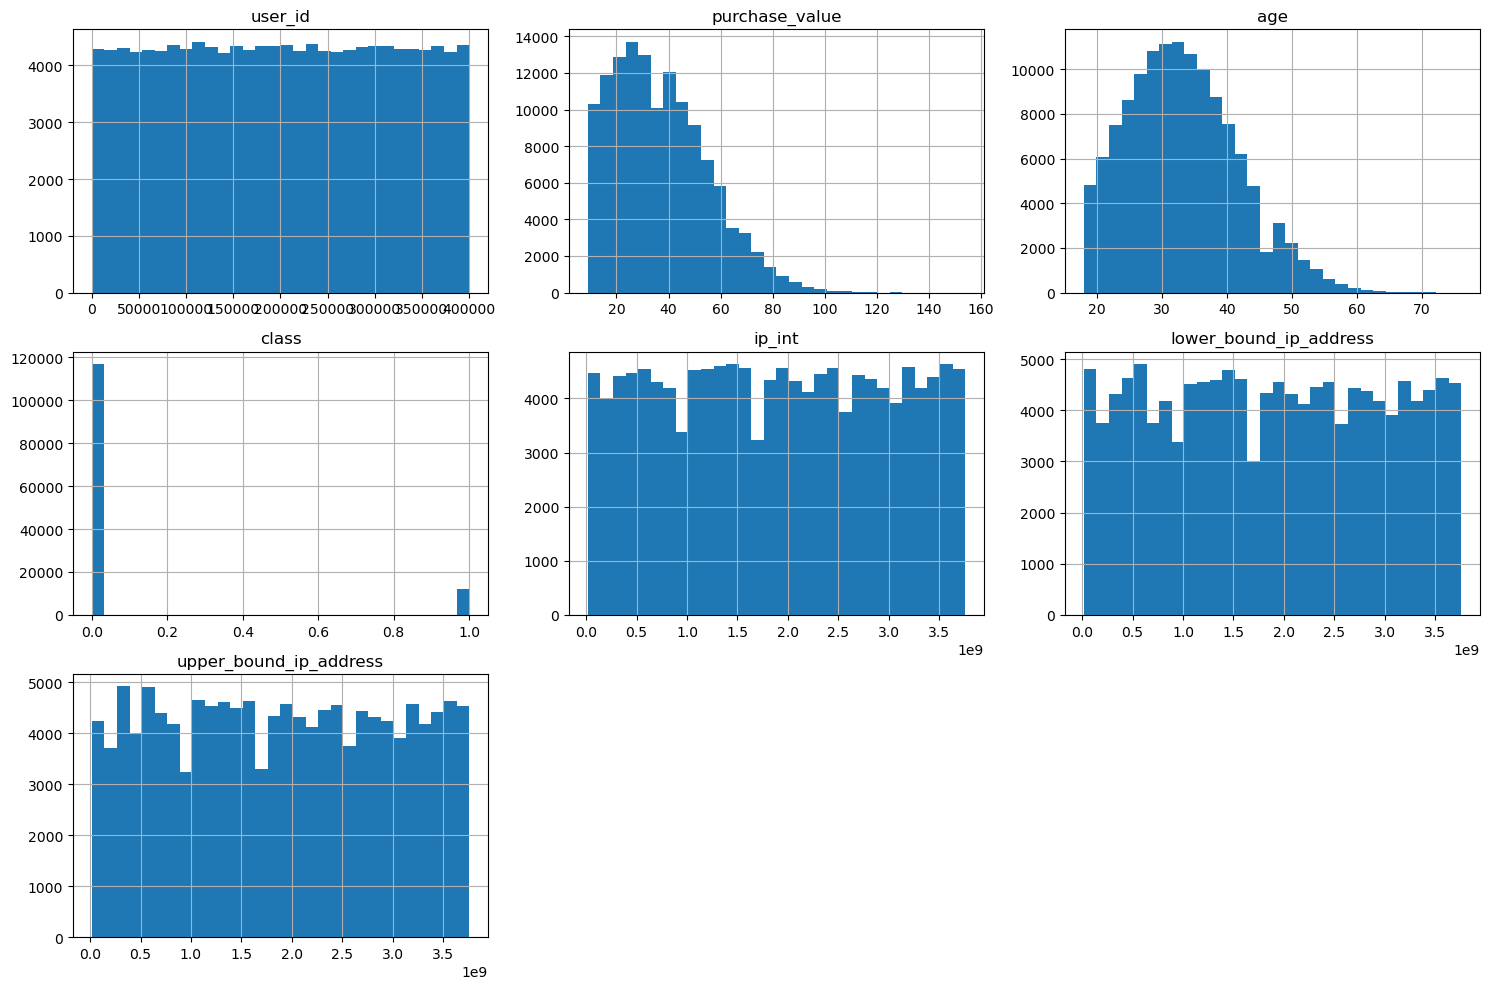

In [86]:
# Visualizing the distributions of numeric variables can help identify patterns, outliers, and data skewness.
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical columns
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
merged_data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Correlation Analysis

In [89]:
# Create a new DataFrame with only numeric columns
merged_data_numeric = merged_data.select_dtypes(include=['int64', 'float64'])


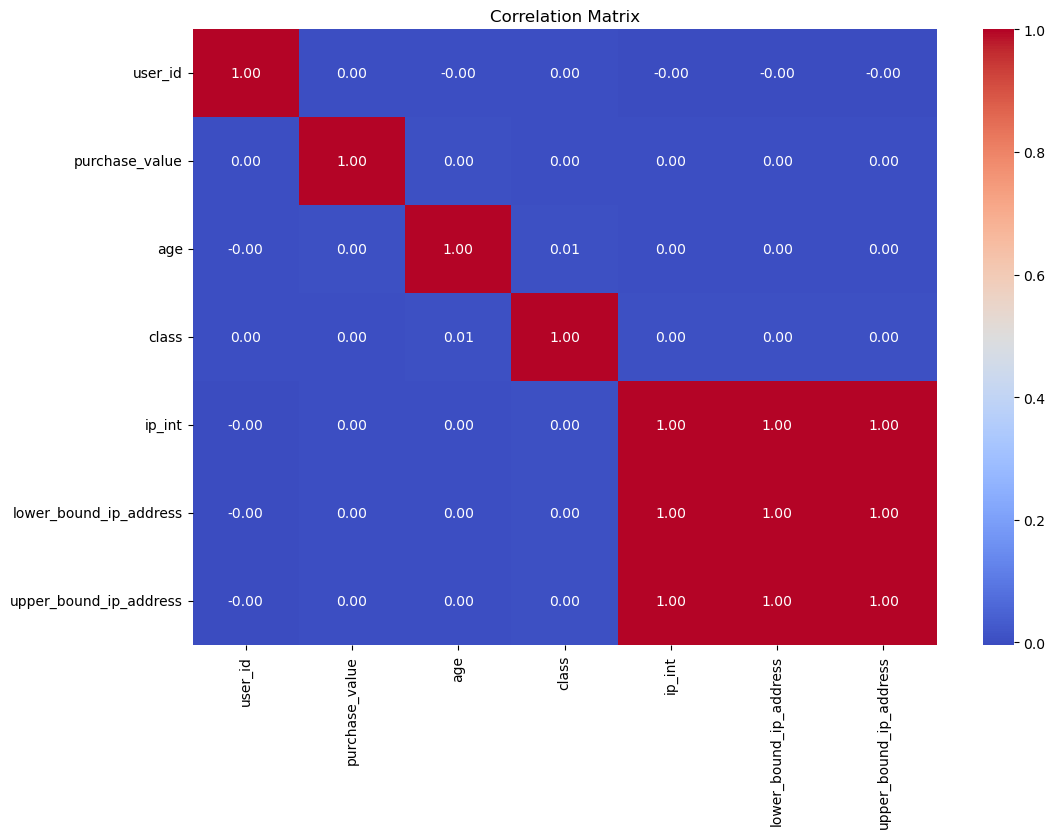

In [90]:
# Calculate the correlation matrix
correlation_matrix = merged_data_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Categorical Variables Analysis


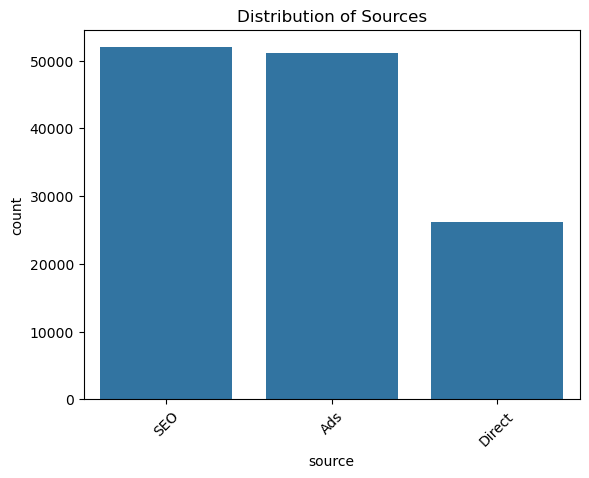

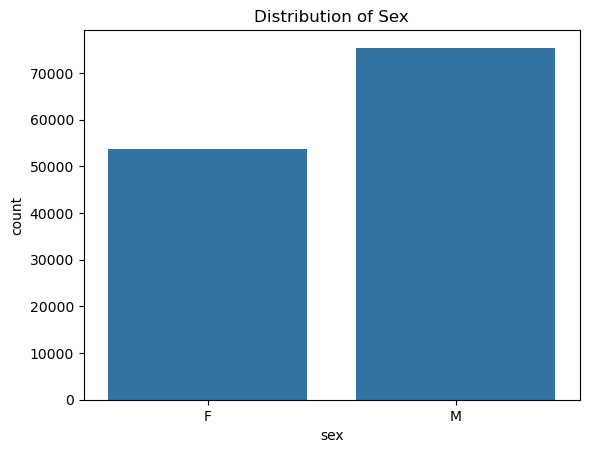

In [91]:
# Count plot for 'source'
sns.countplot(data=merged_data, x='source')
plt.title("Distribution of Sources")
plt.xticks(rotation=45)
plt.show()

# Count plot for 'sex'
sns.countplot(data=merged_data, x='sex')
plt.title("Distribution of Sex")
plt.show()


###  Grouping and Aggregating Data

  sex  purchase_value
0   F       36.961419
1   M       36.911838


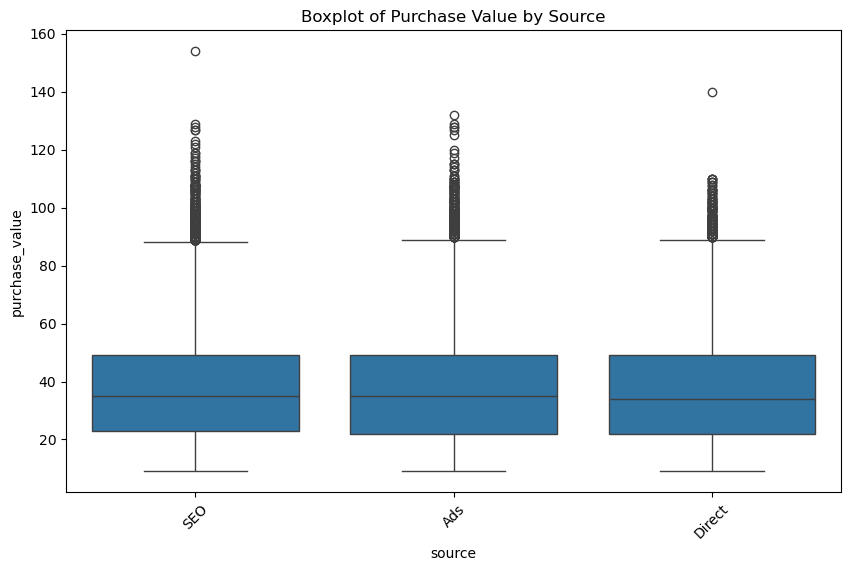

In [92]:
# Group by 'sex' and calculate mean purchase value
mean_purchase_by_sex = merged_data.groupby('sex')['purchase_value'].mean().reset_index()
print(mean_purchase_by_sex)

# Boxplot for purchase value by source
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='source', y='purchase_value')
plt.title("Boxplot of Purchase Value by Source")
plt.xticks(rotation=45)
plt.show()


### Time Series Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_6808\2336560550.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  signup_trends = merged_data.resample('M', on='signup_time').size()


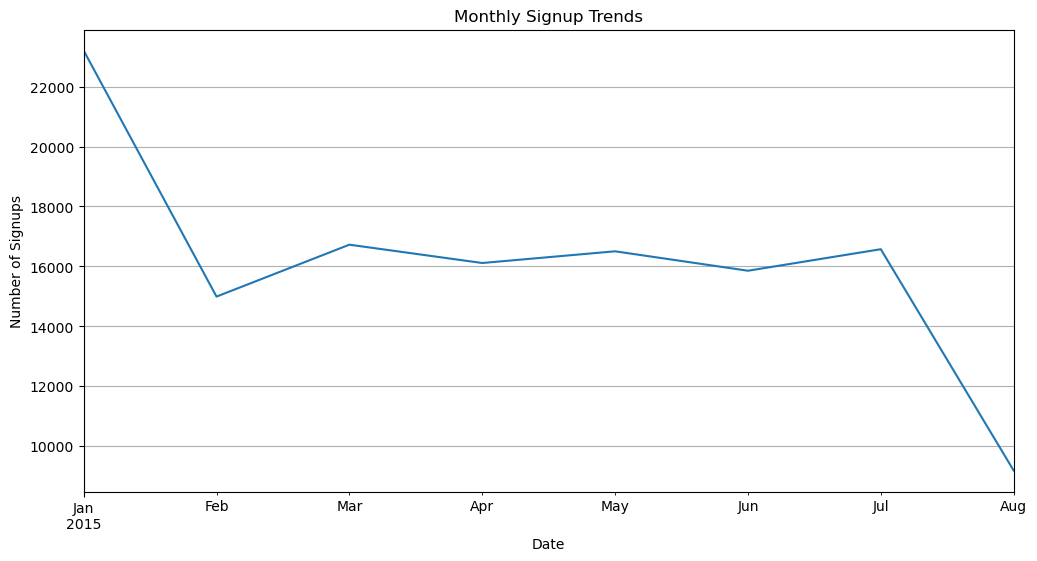

In [93]:
# Convert signup_time to datetime if not already
merged_data['signup_time'] = pd.to_datetime(merged_data['signup_time'])

# Resample by month and count
signup_trends = merged_data.resample('M', on='signup_time').size()

plt.figure(figsize=(12, 6))
signup_trends.plot()
plt.title("Monthly Signup Trends")
plt.xlabel("Date")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()


### Purchase Trends

C:\Users\user\AppData\Local\Temp\ipykernel_6808\399591747.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  purchase_trends = merged_data.resample('M', on='purchase_time').size()


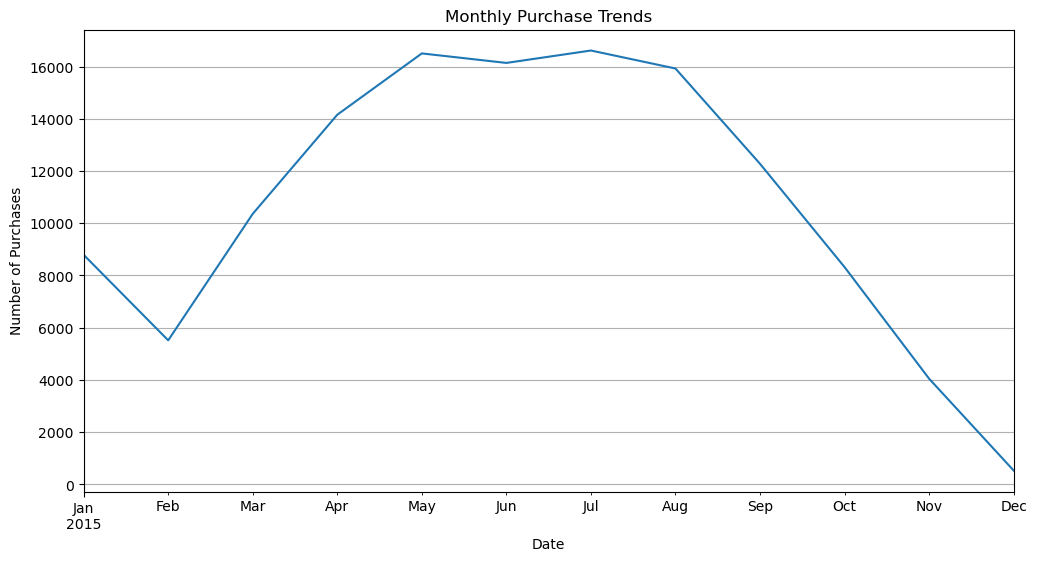

In [94]:
# Convert purchase_time to datetime if not already
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Resample by month and count
purchase_trends = merged_data.resample('M', on='purchase_time').size()

plt.figure(figsize=(12, 6))
purchase_trends.plot()
plt.title("Monthly Purchase Trends")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.grid()
plt.show()


### Outlier Detection

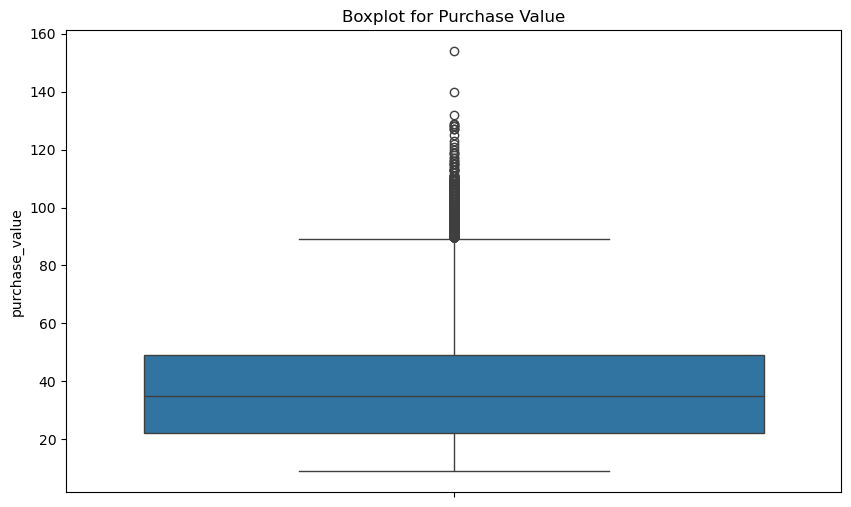

        user_id         signup_time       purchase_time  purchase_value  \
651       54076 2015-06-05 21:54:47 2015-09-04 11:28:07              83   
657      289443 2015-03-14 20:26:54 2015-04-21 23:38:57              75   
667       69445 2015-03-08 16:33:57 2015-05-25 07:54:22              79   
680        7097 2015-07-05 22:00:28 2015-07-20 04:40:00              81   
689      143340 2015-03-06 18:12:41 2015-06-27 09:11:35              80   
...         ...                 ...                 ...             ...   
131590   336825 2015-08-11 22:42:36 2015-08-19 19:28:43              71   
131598    25697 2015-04-29 13:32:00 2015-07-29 07:37:30              81   
131604   224416 2015-06-22 07:02:18 2015-07-25 23:55:40              79   
131609    95777 2015-02-10 10:48:05 2015-05-27 18:23:18              89   
131641    92006 2015-04-19 06:40:53 2015-05-09 09:30:25              74   

            device_id  source  browser sex  age  class  ip_address_str  \
651     ZJWGQIGESUEHS    

In [95]:
# Boxplot for outlier detection in purchase_value
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, y='purchase_value')
plt.title("Boxplot for Purchase Value")
plt.show()

# Identify outliers
outliers = merged_data[merged_data['purchase_value'] > merged_data['purchase_value'].quantile(0.95)]
print(outliers)


# 	Feature Engineering:

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class FeatureEngineering:
    def __init__(self, df: pd.DataFrame, logging):
        self.df = df.copy()
        self.processed_df = None
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.logging = logging
        self.logging.info("FeatureEngineering class initialized with the provided DataFrame.")

    def preprocess_datetime(self):
        self.logging.info("Preprocessing datetime features...")
        try:
            self.df['signup_time'] = pd.to_datetime(self.df['signup_time'])
            self.df['purchase_time'] = pd.to_datetime(self.df['purchase_time'])
            self.df['hour_of_day'] = self.df['purchase_time'].dt.hour
            self.df['day_of_week'] = self.df['purchase_time'].dt.dayofweek
            self.df['purchase_delay'] = (
                (self.df['purchase_time'] - self.df['signup_time']).dt.total_seconds() / 3600
            )
            self.logging.info("Datetime features successfully created.")
        except Exception as e:
            self.logging.error("Error in preprocessing datetime features: %s", e)
            raise

    def calculate_transaction_frequency(self):
        self.logging.info("Calculating transaction frequency and velocity...")
        try:
            user_freq = self.df.groupby('user_id').size()
            self.df['user_transaction_frequency'] = self.df['user_id'].map(user_freq)

            device_freq = self.df.groupby('device_id').size()
            self.df['device_transaction_frequency'] = self.df['device_id'].map(device_freq)

            self.df['user_transaction_velocity'] = (
                self.df['user_transaction_frequency'] / self.df['purchase_delay']
            )
            self.logging.info("Transaction frequency and velocity calculated successfully.")
        except Exception as e:
            self.logging.error("Error in calculating transaction frequency and velocity: %s", e)
            raise

    def normalize_and_scale(self):
        self.logging.info("Normalizing and scaling numerical features...")
        try:
            numerical_features = [
                'purchase_value', 'user_transaction_frequency', 'device_transaction_frequency',
                'user_transaction_velocity', 'hour_of_day', 'day_of_week', 'purchase_delay', 'age'
            ]
            self.df[numerical_features] = self.scaler.fit_transform(self.df[numerical_features])
            self.logging.info("Numerical features normalized and scaled successfully.")
        except Exception as e:
            self.logging.error("Error in normalizing and scaling numerical features: %s", e)
            raise

    def encode_categorical_features(self):
        self.logging.info("Encoding categorical features...")
        try:
            categorical_features = ['source', 'browser', 'sex']
            self.df = pd.get_dummies(self.df, columns=categorical_features, drop_first=True)
            self.logging.info("Categorical features encoded successfully.")
        except Exception as e:
            self.logging.error("Error in encoding categorical features: %s", e)
            raise

    def pipeline(self):
        self.logging.info("Starting the feature engineering pipeline...")
        try:
            self.preprocess_datetime()
            self.calculate_transaction_frequency()
            self.normalize_and_scale()
            self.encode_categorical_features()
            self.processed_df = self.df
            self.logging.info("Feature engineering pipeline executed successfully.")
        except Exception as e:
            self.logging.error("Error in the feature engineering pipeline: %s", e)
            raise

    def get_processed_data(self) -> pd.DataFrame:
        self.logging.info("Retrieving processed data...")
        if self.processed_df is None:
            self.logging.error("Data has not been processed. Run the pipeline() method first.")
            raise ValueError("Data has not been processed. Run the pipeline() method first.")
        self.logging.info("Processed data retrieved successfully.")
        return self.processed_df


In [123]:
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load your dataset
fraud_data = pd.read_csv("../data/Fraud_Data.csv")

# Initialize and run the pipeline
feature_engineering = FeatureEngineering(df=fraud_data, logging=logger)
feature_engineering.pipeline()

# Get the processed data
processed_data = feature_engineering.get_processed_data()
print(processed_data.head())


2024-10-20 11:06:47,196 - INFO - FeatureEngineering class initialized with the provided DataFrame.
2024-10-20 11:06:47,196 - INFO - Starting the feature engineering pipeline...
2024-10-20 11:06:47,196 - INFO - Preprocessing datetime features...
2024-10-20 11:06:47,742 - INFO - Datetime features successfully created.
2024-10-20 11:06:47,742 - INFO - Calculating transaction frequency and velocity...
2024-10-20 11:06:48,264 - INFO - Transaction frequency and velocity calculated successfully.
2024-10-20 11:06:48,282 - INFO - Normalizing and scaling numerical features...
2024-10-20 11:06:48,377 - INFO - Numerical features normalized and scaled successfully.
2024-10-20 11:06:48,377 - INFO - Encoding categorical features...
2024-10-20 11:06:48,528 - INFO - Categorical features encoded successfully.
2024-10-20 11:06:48,537 - INFO - Feature engineering pipeline executed successfully.
2024-10-20 11:06:48,537 - INFO - Retrieving processed data...
2024-10-20 11:06:48,540 - INFO - Processed data re

   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11       -0.160204   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54       -1.142592   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45       -1.197169   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50        0.385567   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53        0.112681   

       device_id       age    ip_address  class  hour_of_day  day_of_week  \
0  QVPSPJUOCKZAR  0.679914  7.327584e+08      0    -1.377455     0.991020   
1  EOGFQPIZPYXFZ  2.304476  3.503114e+08      0    -1.522122    -1.501259   
2  YSSKYOSJHPPLJ  2.304476  2.621474e+09      1     0.937208    -0.005891   
3  ATGTXKYKUDUQN  0.911994  3.840542e+09      0     0.213876    -1.501259   
4  NAUITBZFJKHWW  1.376155  4.155831e+08      0     0.937208    -0.504347   

   ...  user_transaction_frequency  device_transaction_frequency  \
0  ...                         0.0              

In [124]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [127]:
# Import the class
#from feature_engineering import FeatureEngineering

# Step 1: Initialize the class with the DataFrame
feature_engineering = FeatureEngineering(fraud_data, logger)

# Step 2: Run the pipeline to process the data
feature_engineering.pipeline()

# Step 3: Retrieve the processed DataFrame
processed_data = feature_engineering.get_processed_data()

# View the processed data
display(processed_data.head())

2024-10-20 11:23:45,836 - INFO - FeatureEngineering class initialized with the provided DataFrame.
2024-10-20 11:23:45,845 - INFO - Starting the feature engineering pipeline...
2024-10-20 11:23:45,845 - INFO - Preprocessing datetime features...
2024-10-20 11:23:46,331 - INFO - Datetime features successfully created.
2024-10-20 11:23:46,331 - INFO - Calculating transaction frequency and velocity...
2024-10-20 11:23:46,838 - INFO - Transaction frequency and velocity calculated successfully.
2024-10-20 11:23:46,850 - INFO - Normalizing and scaling numerical features...
2024-10-20 11:23:46,932 - INFO - Numerical features normalized and scaled successfully.
2024-10-20 11:23:46,932 - INFO - Encoding categorical features...
2024-10-20 11:23:47,081 - INFO - Categorical features encoded successfully.
2024-10-20 11:23:47,081 - INFO - Feature engineering pipeline executed successfully.
2024-10-20 11:23:47,081 - INFO - Retrieving processed data...
2024-10-20 11:23:47,095 - INFO - Processed data re

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,hour_of_day,day_of_week,...,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,7.327584e+08,0,-1.377455,0.991020,...,0.0,-0.261514,-0.230128,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,3.503114e+08,0,-1.522122,-1.501259,...,0.0,-0.261514,-0.229874,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,0.937208,-0.005891,...,0.0,3.941861,4.345476,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3.840542e+09,0,0.213876,-1.501259,...,0.0,-0.261514,-0.230120,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,4.155831e+08,0,0.937208,-0.504347,...,0.0,-0.261514,-0.230128,False,False,False,False,False,True,True


In [128]:
# Save the processed datase to the csv for modeling
processed_data.to_csv('../data/processed_fraud_data.csv')